In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Normalize pixel values (convert to range [0,1])
x_train, x_test = x_train / 255.0, x_test / 255.0
# Reshape to add a channel dimension (needed for CNN)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Define the CNN model
model = keras.Sequential([
layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.Flatten(),
layers.Dense(64, activation='relu'),
layers.Dense(10, activation='softmax') # 10 classes (digits 0-9)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Compile the model
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [7]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.9876 - loss: 0.0409 - val_accuracy: 0.9887 - val_loss: 0.0365
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 96ms/step - accuracy: 0.9900 - loss: 0.0322 - val_accuracy: 0.9917 - val_loss: 0.0331
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 95ms/step - accuracy: 0.9916 - loss: 0.0261 - val_accuracy: 0.9902 - val_loss: 0.0360
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 96ms/step - accuracy: 0.9923 - loss: 0.0234 - val_accuracy: 0.9903 - val_loss: 0.0360
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 94ms/step - accuracy: 0.9947 - loss: 0.0163 - val_accuracy: 0.9923 - val_loss: 0.0338


In [8]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

313/313 - 2s - 7ms/step - accuracy: 0.9904 - loss: 0.0327
Test accuracy: 0.9904


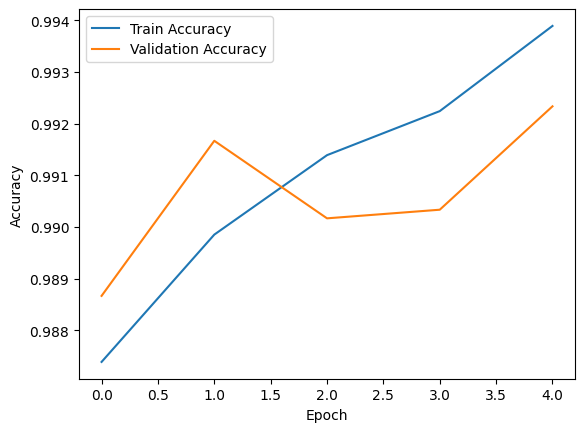

In [9]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()